In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
import localSettings as ls
import math
print(ls.main_path)
import load_data_run123
import plotter_alex
import importlib
importlib.reload(plotter_alex)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward
from matplotlib import gridspec
from collections import defaultdict

/home/alex/NuMI/PELEE/


In [2]:
ending = "Jan19b"

#THINK - did you last unfold with nuwro or without?

##  Energy

## Closure Tests

## Blockwise Unfolding

In [3]:

with open('../blockwise/stv-analysis-new/blockwise_unsmeared_events_leptonMom_MC_ONLY_weighted_recoCut_incErr_'+ending+'.csv') as file:
    content = file.readlines()
events = content[0:]
    
for i in range(16):
    events[i]=events[i].rstrip().rstrip(',')
    events[i] = float(events[i])
    
print("Unsmeared events")
print(events)
print("")

#------------------------------------------------------------------------------
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_AC_leptonMom_MC_ONLY_weighted_recoCut_incErr_'+ending+'.csv') as file:
    content = file.readlines()
AC = content[0:]
    
for i in range(256):
    AC[i]=AC[i].rstrip().rstrip(',')
    AC[i] = float(AC[i])
    

chunks = [AC[x:x+16] for x in range(0, len(AC), 16)]

print("AC")
print(chunks)
print("")
#---------------------------------------------------------------

with open('nue_full_500_catsel_nopions_leptonMom_usingSelection_prior_true_signal_blockwise_recoCut_comb_'+ending+'.csv') as file:
    content = file.readlines()
prior_true = content[0:]
    
for i in range(16):
    prior_true[i]=prior_true[i].rstrip().rstrip(',')
    prior_true[i] = float(prior_true[i])
    
print("Prior Truth: ")
print(prior_true)
print("")

#----------------------------------------------------------------
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_errors_leptonMom_MC_ONLY_weighted_recoCut_incErr_'+ending+'.csv') as file:
    content = file.readlines()
errs = content[0:]
    
for i in range(16):
    errs[i]=errs[i].rstrip().rstrip(',')
    errs[i] = float(errs[i])
    
print("Errors: ")
print(errs)
print("")
print("################################################################")
print("")

#----------------------------------------------------------------
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_cov_matrix_leptonMom_MC_ONLY_weighted_recoCut_incErr_'+ending+'.csv') as file:
    content = file.readlines()
cov = content[0:]
    
for i in range(256):
    cov[i]=cov[i].rstrip().rstrip(',')
    cov[i] = float(cov[i])
    

chunks_cov = [cov[x:x+16] for x in range(0, len(cov), 16)]

print("cov")
print(chunks_cov)
print("")


Unsmeared events
[146.829, 261.22, 189.336, 116.745, 93.1239, 53.642, 31.1179, 93.6015, 3513.02, 6307.25, 3426.52, 2591.6, 1430.0, 1117.01, 880.494, 344.116]

AC
[[0.605434, 0.0750042, 0.0158052, 0.201629, -0.103572, 0.102352, -0.00945575, 0.0491709, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0750042, 0.513368, 0.206213, -0.0362823, 0.198816, -0.014287, 0.0277678, 0.0488252, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0158052, 0.206213, 0.284424, 0.129127, 0.0319473, 0.0903974, -0.0507835, 0.0749327, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.201629, -0.0362823, 0.129127, 0.310854, 0.0224322, 0.0139415, -0.0339314, 0.0681758, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [-0.103572, 0.198816, 0.0319473, 0.0224322, 0.243325, -0.123137, 0.0598523, 0.0349702, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.102352, -0.014287, 0.0903974, 0.0139415, -0.123137, 0.21068, 0.0419969, 0.109233, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [-0.00945575, 0.0277678, -0.0507835, -0.0339314, 0.0598523, 0.0419969

In [4]:
with open('../blockwise/stv-analysis-new/blocks_16.txt') as file:
    content = file.readlines()
blocks = content[0:]

print(blocks)

['16\n', '0  0\n', '1  0\n', '2  0\n', '3  0\n', '4  0\n', '5  0\n', '6  0\n', '7  0\n', '8  1\n', '9  1\n', '10 1\n', '11 1\n', '12 1\n', '13 1\n', '14 1\n', '15 1\n', '16\n', '0  0\n', '1  0\n', '2  0\n', '3  0\n', '4  0\n', '5  0\n', '6  0\n', '7  0\n', '8  1\n', '9  1\n', '10 1\n', '11 1\n', '12 1\n', '13 1\n', '14 1\n', '15 1\n']


In [5]:

made_data_sig = np.dot(prior_true, chunks)
print("Prior_Truth x AC: ")
print(made_data_sig)
print("")
print("")
print("Unfolding Done with MC Data Signal: ")
print(events)
print("")

diff = made_data_sig - events
print("")
print("Difference")
print(diff)

#for i in made_data_sig:
#    print(i)

print("")
diffasfrac = np.nan_to_num(diff/made_data_sig)
print(diffasfrac*100)

Prior_Truth x AC: 
[ 146.82988352  261.22086418  189.33642035  116.74541348   93.12393998
   53.64239358   31.11807811   93.60200381 3513.02774062 6307.24707723
 3426.52424754 2591.60031837 1430.00193523 1117.00452213  880.49388226
  344.11686445]


Unfolding Done with MC Data Signal: 
[146.829, 261.22, 189.336, 116.745, 93.1239, 53.642, 31.1179, 93.6015, 3513.02, 6307.25, 3426.52, 2591.6, 1430.0, 1117.01, 880.494, 344.116]


Difference
[ 8.83515136e-04  8.64182192e-04  4.20345887e-04  4.13479295e-04
  3.99795047e-05  3.93579731e-04  1.78105016e-04  5.03810457e-04
  7.74062122e-03 -2.92277145e-03  4.24753769e-03  3.18373133e-04
  1.93523385e-03 -5.47787492e-03 -1.17738294e-04  8.64454501e-04]

[ 6.01727056e-04  3.30824337e-04  2.22010053e-04  3.54171768e-04
  4.29315005e-05  7.33710233e-04  5.72352236e-04  5.38247512e-04
  2.20340453e-04 -4.63398915e-05  1.23960532e-04  1.22848084e-05
  1.35330855e-04 -4.90407587e-04 -1.33718469e-05  2.51209571e-04]


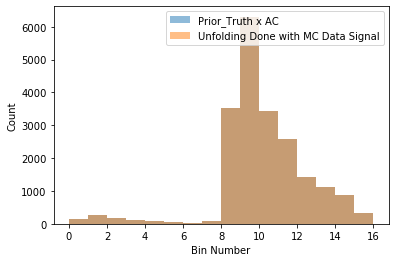

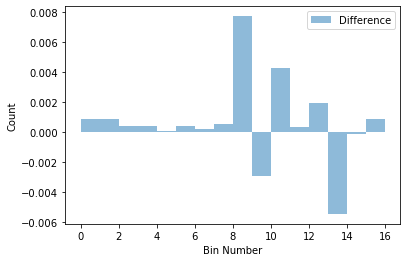

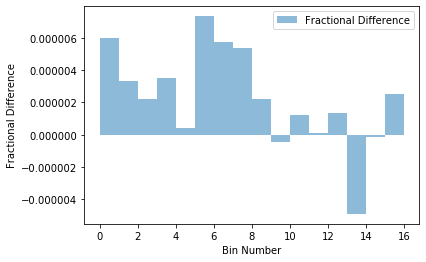

In [6]:
import random
import numpy
from matplotlib import pyplot

bins = np.arange(0, 17, 1)
count = np.arange(0.0, 16.0, 1)

pyplot.hist(count, bins, weights=made_data_sig, alpha=0.5, label='Prior_Truth x AC')
pyplot.hist(count, bins, weights=events, alpha=0.5, label='Unfolding Done with MC Data Signal')
pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Count")
pyplot.show()

pyplot.hist(count, bins, weights=diff, alpha=0.5, label='Difference')
pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Count")
pyplot.show()


pyplot.hist(count, bins, weights=diffasfrac, alpha=0.5, label='Fractional Difference')
pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Fractional Difference")
pyplot.show()

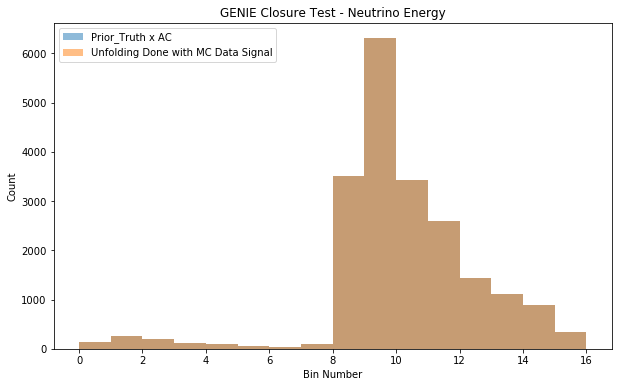

In [7]:
fig = plt.figure(figsize=(10, 6))

pyplot.hist(count, bins, weights=made_data_sig, alpha=0.5, label='Prior_Truth x AC')
pyplot.hist(count, bins, weights=events, alpha=0.5, label='Unfolding Done with MC Data Signal')
pyplot.legend(loc='upper left')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Count")
pyplot.title("GENIE Closure Test - Neutrino Energy")
pyplot.show()

fig.savefig("GENIE_closure_test_lepton_"+ending+".svg",bbox_inches='tight' )

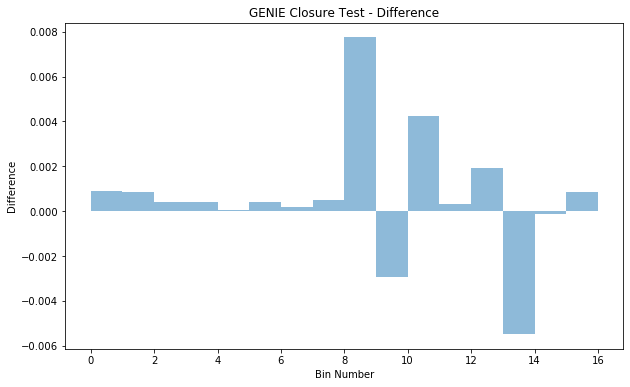

In [8]:
fig = plt.figure(figsize=(10, 6))

pyplot.hist(count, bins, weights=diff, alpha=0.5)
#pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Difference")
pyplot.title("GENIE Closure Test - Difference")
pyplot.show()

fig.savefig("GENIE_closure_test_diff_lepton_"+ending+".svg",bbox_inches='tight' )

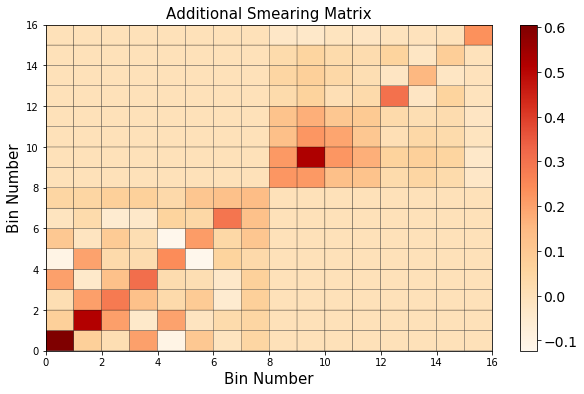

In [9]:
fig = plt.figure(figsize=(10, 6))  
    
plt.pcolor(bins, bins, chunks, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#cbar.set_label(r"Log (Power)", size=15)

plt.xlabel('Bin Number', fontsize=15)
plt.ylabel('Bin Number', fontsize=15)

plt.title('Additional Smearing Matrix', fontsize=15)

plt.show()

fig.savefig("GENIE_closure_test_Ac_lepton_"+ending+".svg",bbox_inches='tight' )

/tmp/ipykernel_34029/3096872113.py:7: RuntimeWarning: invalid value encountered in log
  plt.pcolor(bins, bins, np.log(chunks_cov), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)


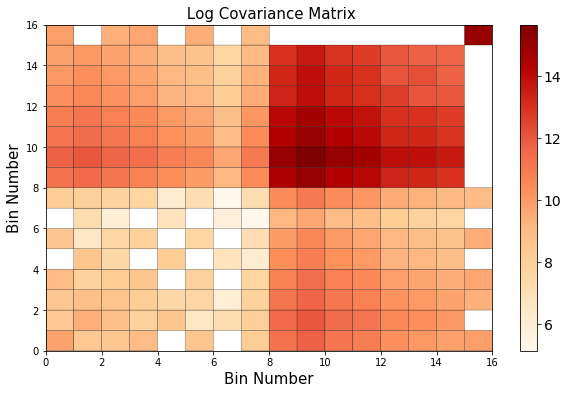

In [10]:
fig = plt.figure(figsize=(10, 6))  

#print(bins)
bins = np.arange(0, 17, 1)
count = np.arange(0.0, 16.0, 1)
    
plt.pcolor(bins, bins, np.log(chunks_cov), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#cbar.set_label(r"Log (Power)", size=15)

plt.xlabel('Bin Number', fontsize=15)
plt.ylabel('Bin Number', fontsize=15)

plt.title(' Log Covariance Matrix', fontsize=15)

plt.show()

## Need to convert to xsec units

xsec = unfolded event counts / (integrated flux * number of argon targets)

In [11]:
###################
### #N argon target calculation
###################

density = 1.3836  #g/cm^3
volume = (246-10)*(106-(-106))*(1026-10)         #cm^3
NA = 6.022E23   #atoms/mol
Nnuc = 40       #nucleans / atom
mmol = 39.95    #g/mol

Narg = (density * volume * NA * Nnuc)/mmol   #nucleons

print("number of argon targets = ", Narg)

number of argon targets =  4.240685683288815e+31


In [12]:
#Need R1 AND R3

####NUE
POT_R1 = 2.0E20 
int_flux_per_POT_R1 = 1.1864530596659353e-11
POT_R3 = 5.014E20
int_flux_per_POT_R3 = 8.628376225834778e-12

int_flux = (int_flux_per_POT_R1*POT_R1) + (int_flux_per_POT_R3*POT_R3)    #cm^-2

print("Nue integrated flux: ", int_flux)

####NUMU

POT_numu_R1 = 2.0E20 
int_flux_per_POT_numu_R1 = 5.455771063338641e-10
POT_numu_R3 = 5.014E20 
int_flux_per_POT_numu_R3 = 3.6729003479115414e-10

int_flux_numu = (int_flux_per_POT_numu_R1*POT_numu_R1) + (int_flux_per_POT_numu_R3*POT_numu_R3)    #cm^-2

print("Numu integrated flux: ", int_flux_numu)

Nue integrated flux:  6699173958.965427
Numu integrated flux:  293274644711.0575


In [13]:
nue_events = np.array(events[0:8])
numu_events = np.array(events[8:16])

nue_errs = np.array(errs[0:8])
numu_errs = np.array(errs[8:16])

In [14]:
#number of events

xsec_nue_events = nue_events / (int_flux * Narg )     
xsec_numu_events = numu_events / (int_flux_numu * Narg )     


#uncertainty

#xsec_nue_errs = nue_errs / (int_flux * Narg )     
#xsec_numu_errs = numu_errs / (int_flux_numu * Narg )     

In [15]:
#Need the four sections of the cov matrix

blockwise_errs = chunks_cov
#print(blockwise_errs)
#print("")

#NUE ONLY
bot_left = blockwise_errs[:8]
for i in range(len(bot_left)):
    bot_left[i] = bot_left[i][:8]
    
nue_errs_bot = np.array(bot_left)/((int_flux*int_flux)*(Narg*Narg))
xsec_nue_errs = (np.sqrt(np.diag(nue_errs_bot)))
    
#MIX
bot_right = blockwise_errs[:8]
for i in range(len(bot_right)):
    bot_right[i] = bot_right[i][8:]
    
mix_errs_bot = np.array(bot_right)/((int_flux*int_flux_numu)*(Narg*Narg))
xsec_botmix_errs = np.nan_to_num(np.sqrt(np.diag(mix_errs_bot)))

    
#MIX
top_left = blockwise_errs[8:]
for i in range(len(top_left)):
    top_left[i] = top_left[i][:8]
    
mix_errs_top = np.array(top_left)/((int_flux*int_flux_numu)*(Narg*Narg))
xsec_topmix_errs = np.nan_to_num(np.sqrt(np.diag(mix_errs_top)))

#NUMU ONLY
top_right = blockwise_errs[8:]
for i in range(len(top_right)):
    top_right[i] = top_right[i][8:]
    
numu_errs_top = np.array(top_right)/((int_flux_numu*int_flux_numu)*(Narg*Narg))
xsec_numu_errs = (np.sqrt(np.diag(numu_errs_top)))


In [16]:
### Calculate ratio uncertainties

xsec_ratio_events = np.nan_to_num(xsec_nue_events/xsec_numu_events)
print("Ratio event counts: ", xsec_ratio_events)
print("")

#####################

ratio_sq = (xsec_nue_events/xsec_numu_events)*(xsec_nue_events/xsec_numu_events)
print("ratio_sq: ", ratio_sq)
print("")
nue_term = (xsec_nue_errs*xsec_nue_errs)/(xsec_nue_events*xsec_nue_events)
print("nue: ", nue_term)
print("")
numu_term = (xsec_numu_errs*xsec_numu_errs)/(xsec_numu_events*xsec_numu_events)
print("numu: ", numu_term)
print("")
mix_1 = (xsec_botmix_errs*xsec_botmix_errs)/(xsec_numu_events*xsec_nue_events)
print("mix: ", mix_1)
print("")
mix_2 = (xsec_topmix_errs*xsec_topmix_errs)/(xsec_numu_events*xsec_nue_events)
print("mix: ", mix_2)
print("")

ratio_var_errs = ratio_sq*(nue_term + numu_term - mix_1 - mix_2)
print(ratio_var_errs)
xsec_ratio_errs = np.nan_to_num(np.sqrt(abs(ratio_var_errs)))
print("Ratio errs: ", xsec_ratio_errs)

Ratio event counts:  [ 1.82971935  1.81309117  2.41898507  1.97207569  2.85087634  2.10233133
  1.54716682 11.90779103]

ratio_sq:  [  3.3478729    3.28729957   5.85148879   3.88908254   8.12749593
   4.41979703   2.39372516 141.79548713]

nue:  [0.82803018 0.17974119 0.14976796 0.36815867 0.39698292 0.72226443
 0.34018789 0.15556815]

numu:  [ 0.16016372  0.15811333  0.15005145  0.15519199  0.15754658  0.16650005
  0.15081204 28.88769387]

mix:  [0.14551915 0.10317922 0.10466864 0.11931794 0.08359117 0.12311092
 0.07998212 0.2588351 ]

mix:  [0.14551915 0.10317922 0.10466864 0.11931794 0.08359117 0.12311092
 0.07998212 0.2588351 ]

[2.33398833e+00 4.32267029e-01 5.29455242e-01 1.10727927e+00
 3.14816248e+00 2.83990805e+00 7.92408467e-01 4.04480019e+03]
Ratio errs:  [ 1.52773962  0.65747017  0.72763675  1.05227338  1.7743062   1.68520267
  0.89017328 63.59874361]


In [17]:
print(xsec_nue_events)
print("")
print(xsec_numu_events)
print("")
print(xsec_nue_errs)
print("")
print(xsec_numu_errs)

[5.16838077e-40 9.19494394e-40 6.66462716e-40 4.10942397e-40
 3.27796126e-40 1.88819839e-40 1.09535007e-40 3.29477278e-40]

[2.82468498e-40 5.07141842e-40 2.75513364e-40 2.08380641e-40
 1.14980829e-40 8.98145007e-41 7.07971540e-41 2.76690511e-41]

[4.70302822e-40 3.89827880e-40 2.57920177e-40 2.49343740e-40
 2.06533130e-40 1.60470695e-40 6.38869814e-41 1.29952850e-40]

[1.13045190e-40 2.01657178e-40 1.06724166e-40 8.20903330e-41
 4.56383490e-41 3.66482839e-41 2.74937388e-41 1.48713605e-40]


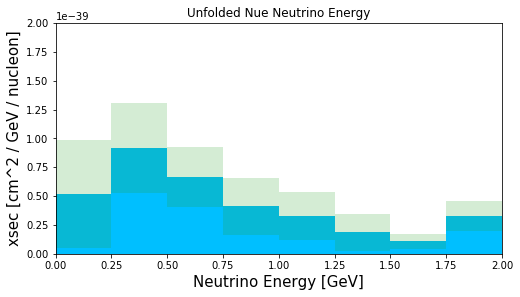

In [18]:
import random
import numpy
from matplotlib import pyplot

nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])
nue_ax1.set_xlim([0, 2])

bins = np.arange(0, 2.25, 0.25)
bincenters = np.arange(0.125, 2.125, 0.25)
bin_edges = np.arange(0, 2.25, 0.25)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
count = np.arange(0.125, 2.125, 0.25)
weights = []
for i in range(len(count)):
    weight = count[i]*xsec_nue_events[i]
    weights.append(weight)

sel = nue_ax1.hist(count, bins, color='deepskyblue', weights=xsec_nue_events)
plt.ylim(0, 2E-39)
nue_ax1.set_xlabel('Neutrino Energy [GeV]', fontsize=15)
nue_ax1.set_ylabel('xsec [cm^2 / GeV / nucleon]', fontsize=15)
nue_ax1.set_title("Unfolded Nue Neutrino Energy")

lower_err = np.nan_to_num(xsec_nue_events-xsec_nue_errs)

nue_ax1.bar(bincenters, xsec_nue_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

nue_fig.savefig("unfolded_MC_nue_lepton_"+ending+".svg",bbox_inches='tight' )

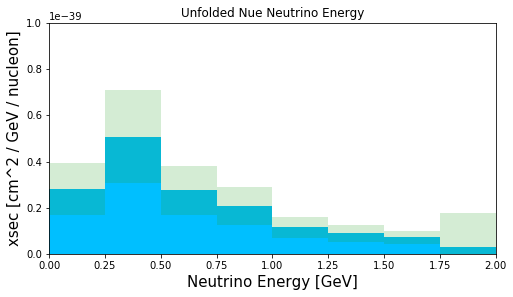

In [19]:
import random
import numpy
from matplotlib import pyplot

numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])
numu_ax1.set_xlim([0, 2])

bins = np.arange(0, 2.25, 0.25)
bincenters = np.arange(0.125, 2.125, 0.25)
bin_edges = np.arange(0, 2.25, 0.25)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
count = np.arange(0.125, 2.125, 0.25)
weights = []
for i in range(len(count)):
    weight = count[i]*xsec_numu_events[i]
    weights.append(weight)

sel = numu_ax1.hist(count, bins, color='deepskyblue', weights=xsec_numu_events)
plt.ylim(0, 1E-39)
numu_ax1.set_xlabel('Neutrino Energy [GeV]', fontsize=15)
numu_ax1.set_ylabel('xsec [cm^2 / GeV / nucleon]', fontsize=15)
numu_ax1.set_title("Unfolded Nue Neutrino Energy")

lower_err = np.nan_to_num(xsec_numu_events-xsec_numu_errs)

numu_ax1.bar(bincenters, xsec_numu_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

numu_fig.savefig("unfolded_MC_numu_lepton_"+ending+".svg",bbox_inches='tight' )

[ 1.82971935  1.81309117  2.41898507  1.97207569  2.85087634  2.10233133
  1.54716682 11.90779103]
[ 1.82971935  1.81309117  2.41898507  1.97207569  2.85087634  2.10233133
  1.54716682 11.90779103]


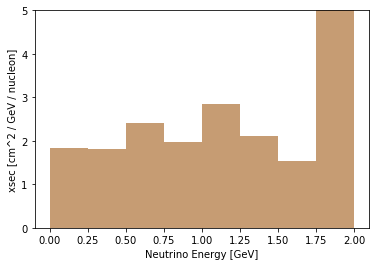

In [20]:
#Think need to replace 2nd bin due to unfolding

import random
import numpy
from matplotlib import pyplot

bins = np.arange(0, 2.25, 0.25)
count = np.arange(0.1, 2.1, 0.25)
#print(count)

plt.ylim(0, 5)
plt.xlabel("Neutrino Energy [GeV]")
plt.ylabel("xsec [cm^2 / GeV / nucleon]")

print(xsec_nue_events/xsec_numu_events)
print(xsec_ratio_events)

pyplot.hist(count, bins, weights=np.nan_to_num(xsec_nue_events/xsec_numu_events), alpha=0.5)
pyplot.hist(count, bins, weights=xsec_ratio_events, alpha=0.5)

#pyplot.legend(loc='upper right')
pyplot.show()


[ 1.82971935  1.81309117  2.41898507  1.97207569  2.85087634  2.10233133
  1.54716682 11.90779103]


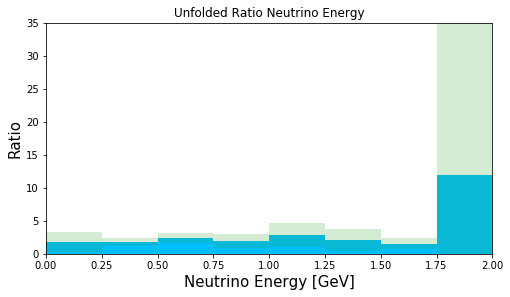

In [21]:
import random
import numpy
from matplotlib import pyplot


ratio_fig = plt.figure(figsize=(8, 7))
ratio_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
ratio_ax1 = plt.subplot(ratio_gs[0])
ratio_ax1.set_xlim([0, 2])

bins = np.arange(0, 2.25, 0.25)
bincenters = np.arange(0.125, 2.125, 0.25)
bin_edges = np.arange(0, 2.25, 0.25)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
count = np.arange(0.125, 2.125, 0.25)
#print(len(count))
#weights = []
#for i in range(len(count)):
#    weight = count[i]*xsec_ratio_events[i]
#    weights.append(weight)


#test_weights = [(random.random()/random.random() - 0.75) for x in range(len(count))]
#print(count)
#xsec_ratio_events[7] = 0
#print(xsec_ratio_events)
print("")
sel = ratio_ax1.hist(count, bins, color='deepskyblue', weights=xsec_ratio_events)  # , weights=xsec_ratio_events
print(sel[0])

plt.ylim(0, 35)
ratio_ax1.set_xlabel('Neutrino Energy [GeV]', fontsize=15)
ratio_ax1.set_ylabel('Ratio', fontsize=15)
ratio_ax1.set_title("Unfolded Ratio Neutrino Energy")

lower_err = np.nan_to_num(xsec_ratio_events-xsec_ratio_errs)

ratio_ax1.bar(bincenters, xsec_ratio_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

ratio_fig.savefig("unfolded_MC_ratio_lepton_"+ending+".svg",bbox_inches='tight' )

In [22]:
nue_frac_err = xsec_nue_errs/xsec_nue_events
numu_frac_err = xsec_numu_errs/xsec_numu_events
ratio_frac_err = xsec_ratio_errs/xsec_ratio_events

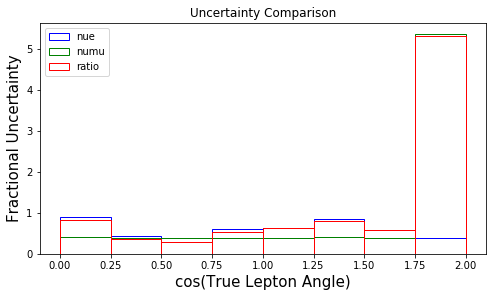

In [23]:
errors_fig = plt.figure(figsize=(8, 7))
errors_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
errors_ax1 = plt.subplot(ratio_gs[0])


bins = np.arange(0, 2.25, 0.25)
count = np.arange(0.1, 2.1, 0.25)
#plt.ylim(0, 1)

sel_nue = errors_ax1.hist(count, bins, edgecolor='blue', facecolor='None', weights=nue_frac_err, label='nue')
sel_numu = errors_ax1.hist(count, bins, edgecolor='green', facecolor='None', weights=numu_frac_err, label='numu')
sel_ratio = errors_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=ratio_frac_err, label='ratio')
errors_ax1.set_ylabel('Fractional Uncertainty', fontsize=15)
errors_ax1.set_xlabel('cos(True Lepton Angle)', fontsize=15)
errors_ax1.set_title("Uncertainty Comparison")
leg = errors_ax1.legend()